In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# It is used to print all the rows and columns inside the dataset

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [56]:
df= pd.read_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v1.csv')

In [57]:
df.head()

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,2024-01-18,19:23:00,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,2024-03-30,02:22:00,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,2024-01-04,17:26:00,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,2024-01-27,16:00:00,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,2024-02-20,23:14:00,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [58]:
df.shape

(50000, 26)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  50000 non-null  int64  
 1   customer_id                     50000 non-null  int64  
 2   device_id                       50000 non-null  int64  
 3   merchant_id                     50000 non-null  int64  
 4   transaction_date                50000 non-null  object 
 5   transaction_time                50000 non-null  object 
 6   amount                          50000 non-null  float64
 7   payment_method                  50000 non-null  object 
 8   is_international                50000 non-null  int64  
 9   merchant_category               50000 non-null  object 
 10  ip_address_risk_score           50000 non-null  float64
 11  device_trust_score              50000 non-null  float64
 12  txn_count_last_24h              

In [60]:
# Taking transaction_month
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_date'].dt.month.value_counts()

transaction_date
1    17223
3    16593
2    16184
Name: count, dtype: int64

In [61]:
df['transaction_date'].dt.month.isnull().sum()

np.int64(0)

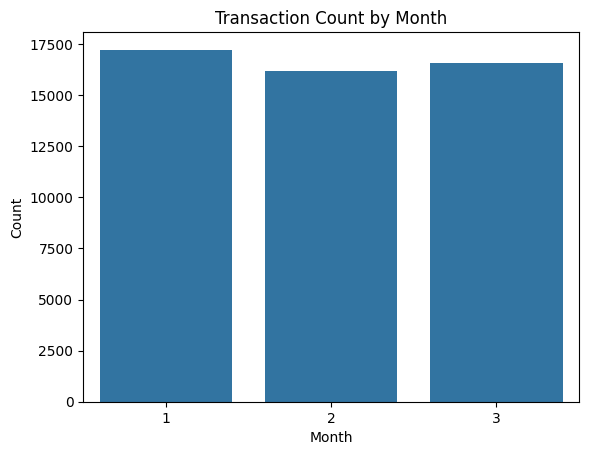

In [62]:
# Plot value counts for transaction_month
sns.countplot(data=df, x=df['transaction_date'].dt.month,)
plt.title('Transaction Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Observations
* Most of the purchases are done in 1st month comparing to other two.
* Second month is slightly low
* Third month is slightly high then second month

In [90]:
# Taking transaction_day column

df['transaction_date'].dt.day.value_counts().sort_index()

transaction_date
1     1684
2     1626
3     1628
4     1674
5     1725
6     1618
7     1587
8     1705
9     1637
10    1746
11    1660
12    1591
13    1608
14    1663
15    1612
16    1602
17    1642
18    1679
19    1675
20    1729
21    1689
22    1674
23    1704
24    1648
25    1634
26    1661
27    1740
28    1720
29    1734
30    1154
31     551
Name: count, dtype: int64

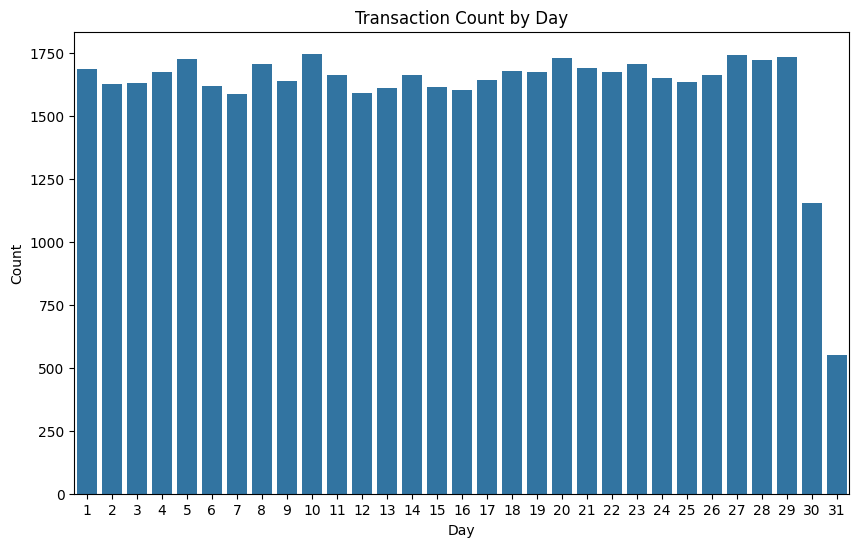

In [64]:
# Plot value counts for transaction_day
transaction_day_counts = df['transaction_date'].dt.day.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(transaction_day_counts)
plt.title('Transaction Count by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### Observation

* From Day 1 to Day 29, the purchasing trend remains relatively consistent.

* On Day 30 and Day 31, the number of transactions declines noticeably.

* This drop may indicate that customers have reduced spending toward the end of the month, possibly due to budget exhaustion or salary cycle effects.

In [65]:
# Taking amount column

df['amount'].describe()

count    50000.000000
mean     10015.213203
std       5756.852793
min         50.510000
25%       5007.712500
50%       9971.515000
75%      15017.282500
max      19999.080000
Name: amount, dtype: float64

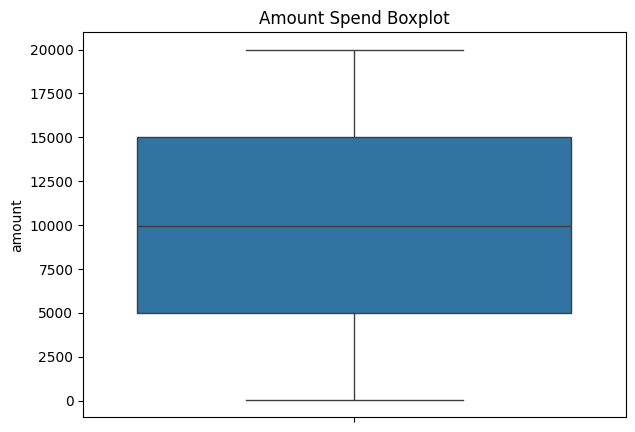

In [66]:
plt.figure(figsize=(7, 5))
sns.boxplot(df['amount'])
plt.title('Amount Spend Boxplot')
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

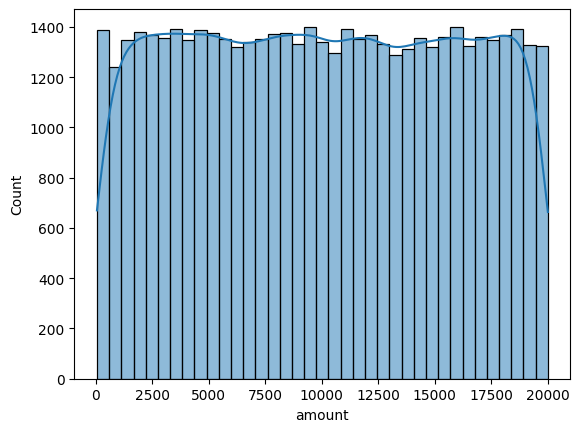

In [67]:
sns.histplot(df['amount'], kde=True)

### Observation

* The maximum spend amount is 19,999, while the minimum spend amount is 50.51.

* The mean spend is approximately 10,015, and the median is around 9,971, which are very close to each other.

    * This indicates that the data is fairly symmetric with no strong skewness.

* The standard deviation is 5,756, suggesting a moderate spread in spending values.

* From the histogram, the distribution appears to be roughly uniform, meaning spending values are spread fairly evenly across the range.

In [68]:
# Taking the payment_method column

df['payment_method'].value_counts()

payment_method
UPI           27573
CARD          12444
NETBANKING     5053
WALLET         4930
Name: count, dtype: int64

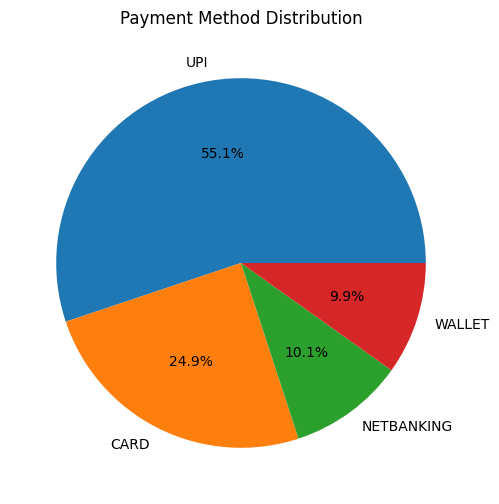

In [69]:
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.ylabel("")
plt.title("Payment Method Distribution")
plt.show()

### Observation

* The majority of customers prefer UPI as their payment method. Around 55.1% are prefer UPI

* Card payments are the second most commonly used method, followed by net banking and wallets.

* The strong preference for digital payment methods suggests a higher volume of online transactions, which may increase exposure to potential fraud risks compared to cash-based transactions.

In [70]:
# Taking is_international column

df['is_international'].value_counts()

is_international
0    48521
1     1479
Name: count, dtype: int64

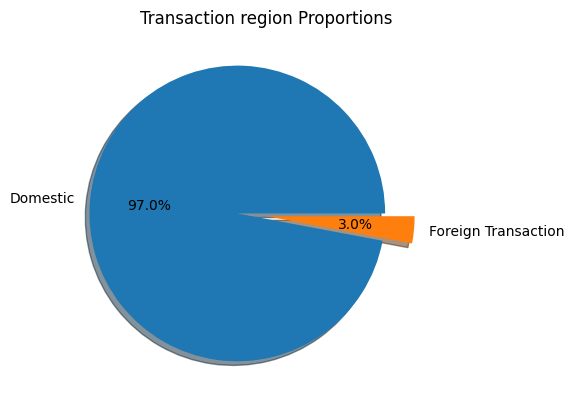

In [71]:
myexplode = [0.2, 0]
plt.pie(df['is_international'].value_counts(), explode=myexplode, shadow = True, autopct='%1.1f%%', labels=['Domestic','Foreign Transaction'])
plt.title('Transaction region Proportions')
plt.show()

### Observation

* The pie chart shows that approximately 97% of transactions are domestic, while foreign transactions account for only about 0.3%.

* This indicates that the vast majority of customers are domestic users.

* Although foreign transactions are relatively rare, they may still be more vulnerable to fraud, which can be further examined in the subsequent EDA steps.

In [72]:
# Taking merchant_category

df['merchant_category'].value_counts()

merchant_category
Electronics    8399
Gaming         8397
Travel         8391
Grocery        8334
Fashion        8253
Utilities      8226
Name: count, dtype: int64

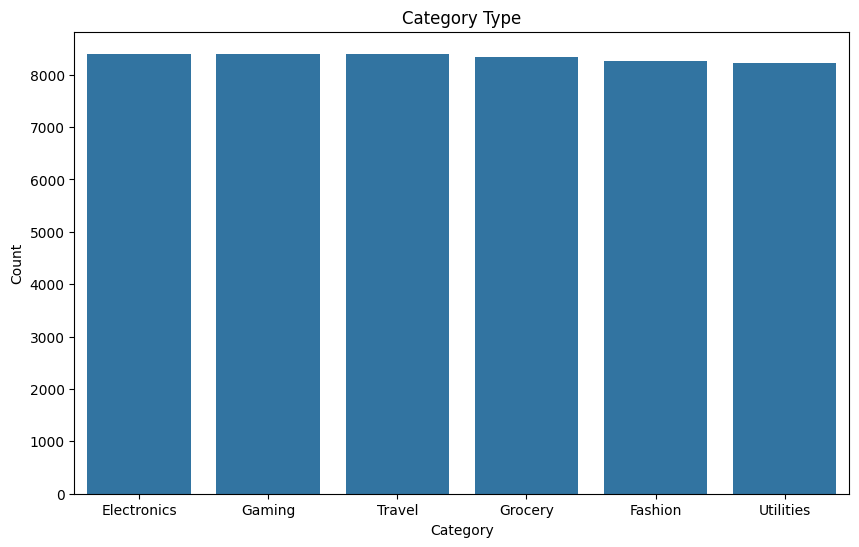

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(df['merchant_category'].value_counts())
plt.title('Category Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### Observation

* The bar chart indicates that all merchant categories have nearly equal transaction counts.

* This suggests that customer purchases are evenly distributed across different categories such as Electronics, Gaming, Travel, Grocery, Fashion, and Utilities.

* There is no single dominant category, implying balanced spending behavior among customers across merchant types.

In [74]:
# Taking avg_amount_last_24h column

df['avg_amount_last_24h'].describe()

count    50000.000000
mean      7534.791518
std       4296.720184
min        100.040000
25%       3828.462500
50%       7504.350000
75%      11266.432500
max      14999.890000
Name: avg_amount_last_24h, dtype: float64

<Axes: xlabel='avg_amount_last_24h', ylabel='Count'>

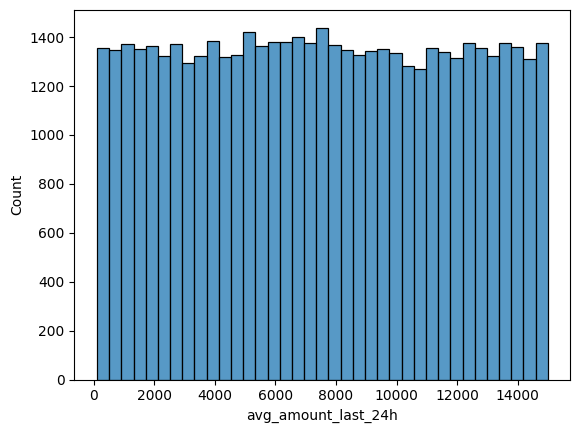

In [75]:
sns.histplot(df['avg_amount_last_24h'])

In [76]:
# Taking device_change flag

df['device_change_flag'].value_counts()

device_change_flag
0    46011
1     3989
Name: count, dtype: int64

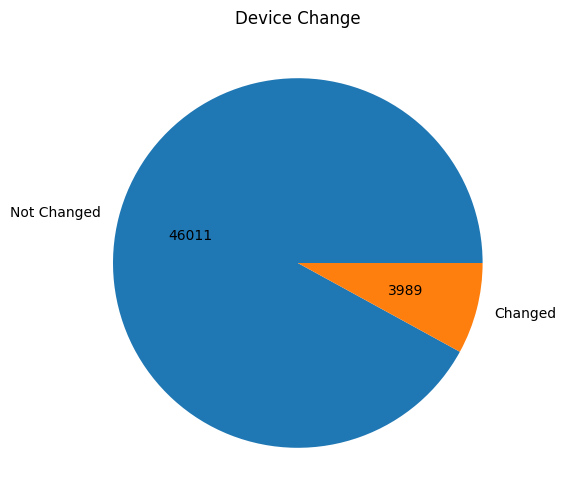

In [77]:
counts = df['device_change_flag'].value_counts()

def show_count(pct):
    total = counts.sum()
    value = int(round(pct * total / 100.0))
    return f'{value}'

plt.figure(figsize=(6,6))
plt.pie(counts, labels=['Not Changed','Changed'], autopct=show_count)
plt.title("Device Change")
plt.show()


### Observation
* The majority of customers do not change their devices while making transactions.

* However, 3,989 customers have used a different device, which may indicate that they are placing orders from multiple devices such as mobile phones, laptops, or tablets.

* Frequent device changes could also be a potential indicator of suspicious or fraudulent activity, which should be examined further in subsequent analysis.

In [78]:
# Taking location_change_flag column

df['location_change_flag'].value_counts()

location_change_flag
0    45063
1     4937
Name: count, dtype: int64

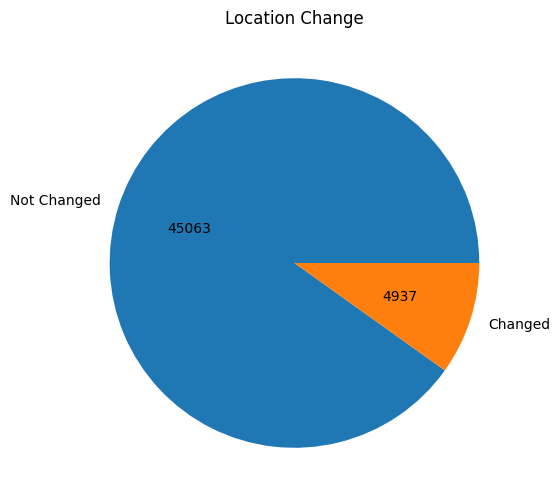

In [79]:
counts = df['location_change_flag'].value_counts()

def show_count(pct):
    total = counts.sum()
    value = int(round(pct * total / 100.0))
    return f'{value}'

plt.figure(figsize=(6,6))
plt.pie(counts, labels=['Not Changed','Changed'], autopct=show_count)
plt.title("Location Change")
plt.show()


### Observation

* The vast majority of customers (45,063 transactions) show no change in location during transactions.

* A smaller portion (4,937 transactions) involves a change in location.

* This indicates that most transactions occur from consistent and expected locations, reflecting normal user behavior.

* However, transactions with location changes could represent travel, use of different networks, or potential fraudulent activity, and therefore should be further analyzed in relation to fraud indicators.

In [80]:
# Taking authentication_method column

df['authentication_method'].value_counts()

authentication_method
OTP     29842
3DS      7687
PIN      7401
NONE     5070
Name: count, dtype: int64

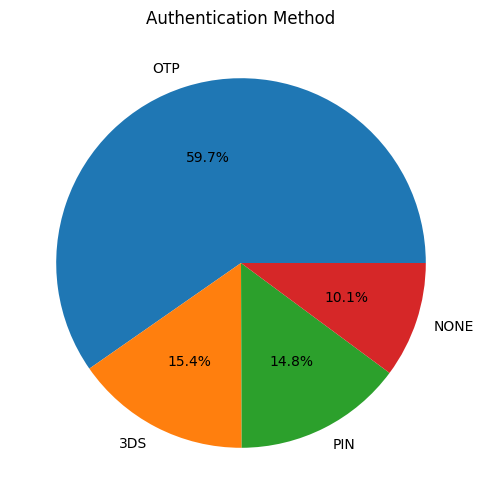

In [81]:
df['authentication_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.ylabel("")
plt.title("Authentication Method")
plt.show()

### Observation

* The majority of transactions (approximately 59.7%) use OTP-based authentication, making it the most common security method.

* 3DS (15.4%) and PIN (14.8%) authentication methods are used at moderate and similar levels.

* Around 10.1% of transactions have no authentication, which may represent a potential security risk and should be examined further.

* Overall, the high reliance on OTP authentication suggests strong adoption of secure verification mechanisms, but transactions without authentication may require additional monitoring for possible fraud.

In [82]:
# Taking hour_of_day column

df['hour_of_day'].value_counts()

hour_of_day
6     2169
10    2167
21    2150
13    2130
20    2122
15    2104
9     2101
16    2100
7     2099
0     2089
18    2089
11    2087
19    2087
14    2066
3     2059
4     2056
23    2055
17    2052
22    2052
2     2048
8     2048
12    2036
1     2021
5     2013
Name: count, dtype: int64

<Axes: xlabel='hour_of_day', ylabel='Count'>

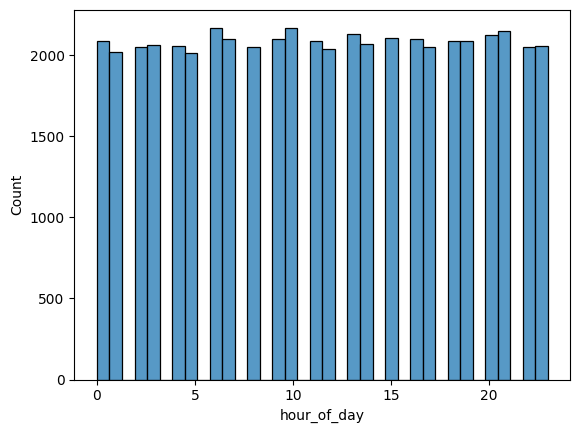

In [83]:
sns.histplot(df['hour_of_day'])

In [84]:
df['is_weekend'].value_counts()

is_weekend
0    36294
1    13706
Name: count, dtype: int64

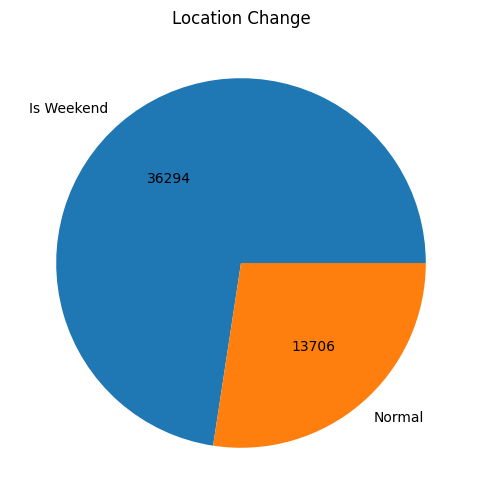

In [85]:
counts = df['is_weekend'].value_counts()

def show_count(pct):
    total = counts.sum()
    value = int(round(pct * total / 100.0))
    return f'{value}'

plt.figure(figsize=(6,6))
plt.pie(counts, labels=['Is Weekend','Normal'], autopct=show_count)
plt.title("Location Change")
plt.show()

In [86]:
# Taking is_fraud column

df['is_fraud'].value_counts()

is_fraud
0    44972
1     5028
Name: count, dtype: int64

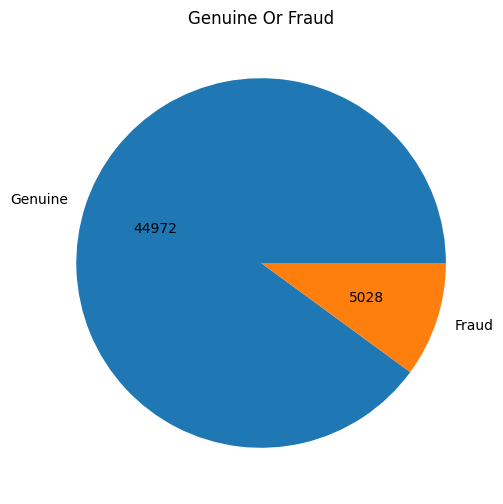

In [87]:
counts = df['is_fraud'].value_counts()

def show_count(pct):
    total = counts.sum()
    value = int(round(pct * total / 100.0))
    return f'{value}'

plt.figure(figsize=(6,6))
plt.pie(counts, labels=['Genuine','Fraud'], autopct=show_count)
plt.title("Genuine Or Fraud")
plt.show()

### Observation

* The dataset contains 44,972 genuine transactions and 5,028 fraudulent transactions.

* Fraudulent transactions represent a small minority compared to genuine ones, indicating a class imbalance in the target variable.

* This imbalance suggests that fraud detection modeling may require special handling, such as:

* Resampling techniques (oversampling/undersampling)

* Using appropriate evaluation metrics (Precision, Recall, F1-score, ROC-AUC) instead of only accuracy

* Proper handling of this imbalance is important to ensure the model can effectively detect fraud cases without being biased toward genuine transactions.

In [88]:
df.select_dtypes('int').columns

Index(['transaction_id', 'customer_id', 'device_id', 'merchant_id',
       'is_international', 'txn_count_last_24h', 'merchant_diversity_last_7d',
       'device_change_flag', 'location_change_flag',
       'past_fraud_count_customer', 'past_disputes_customer', 'hour_of_day',
       'day_of_week', 'is_weekend', 'is_fraud'],
      dtype='object')

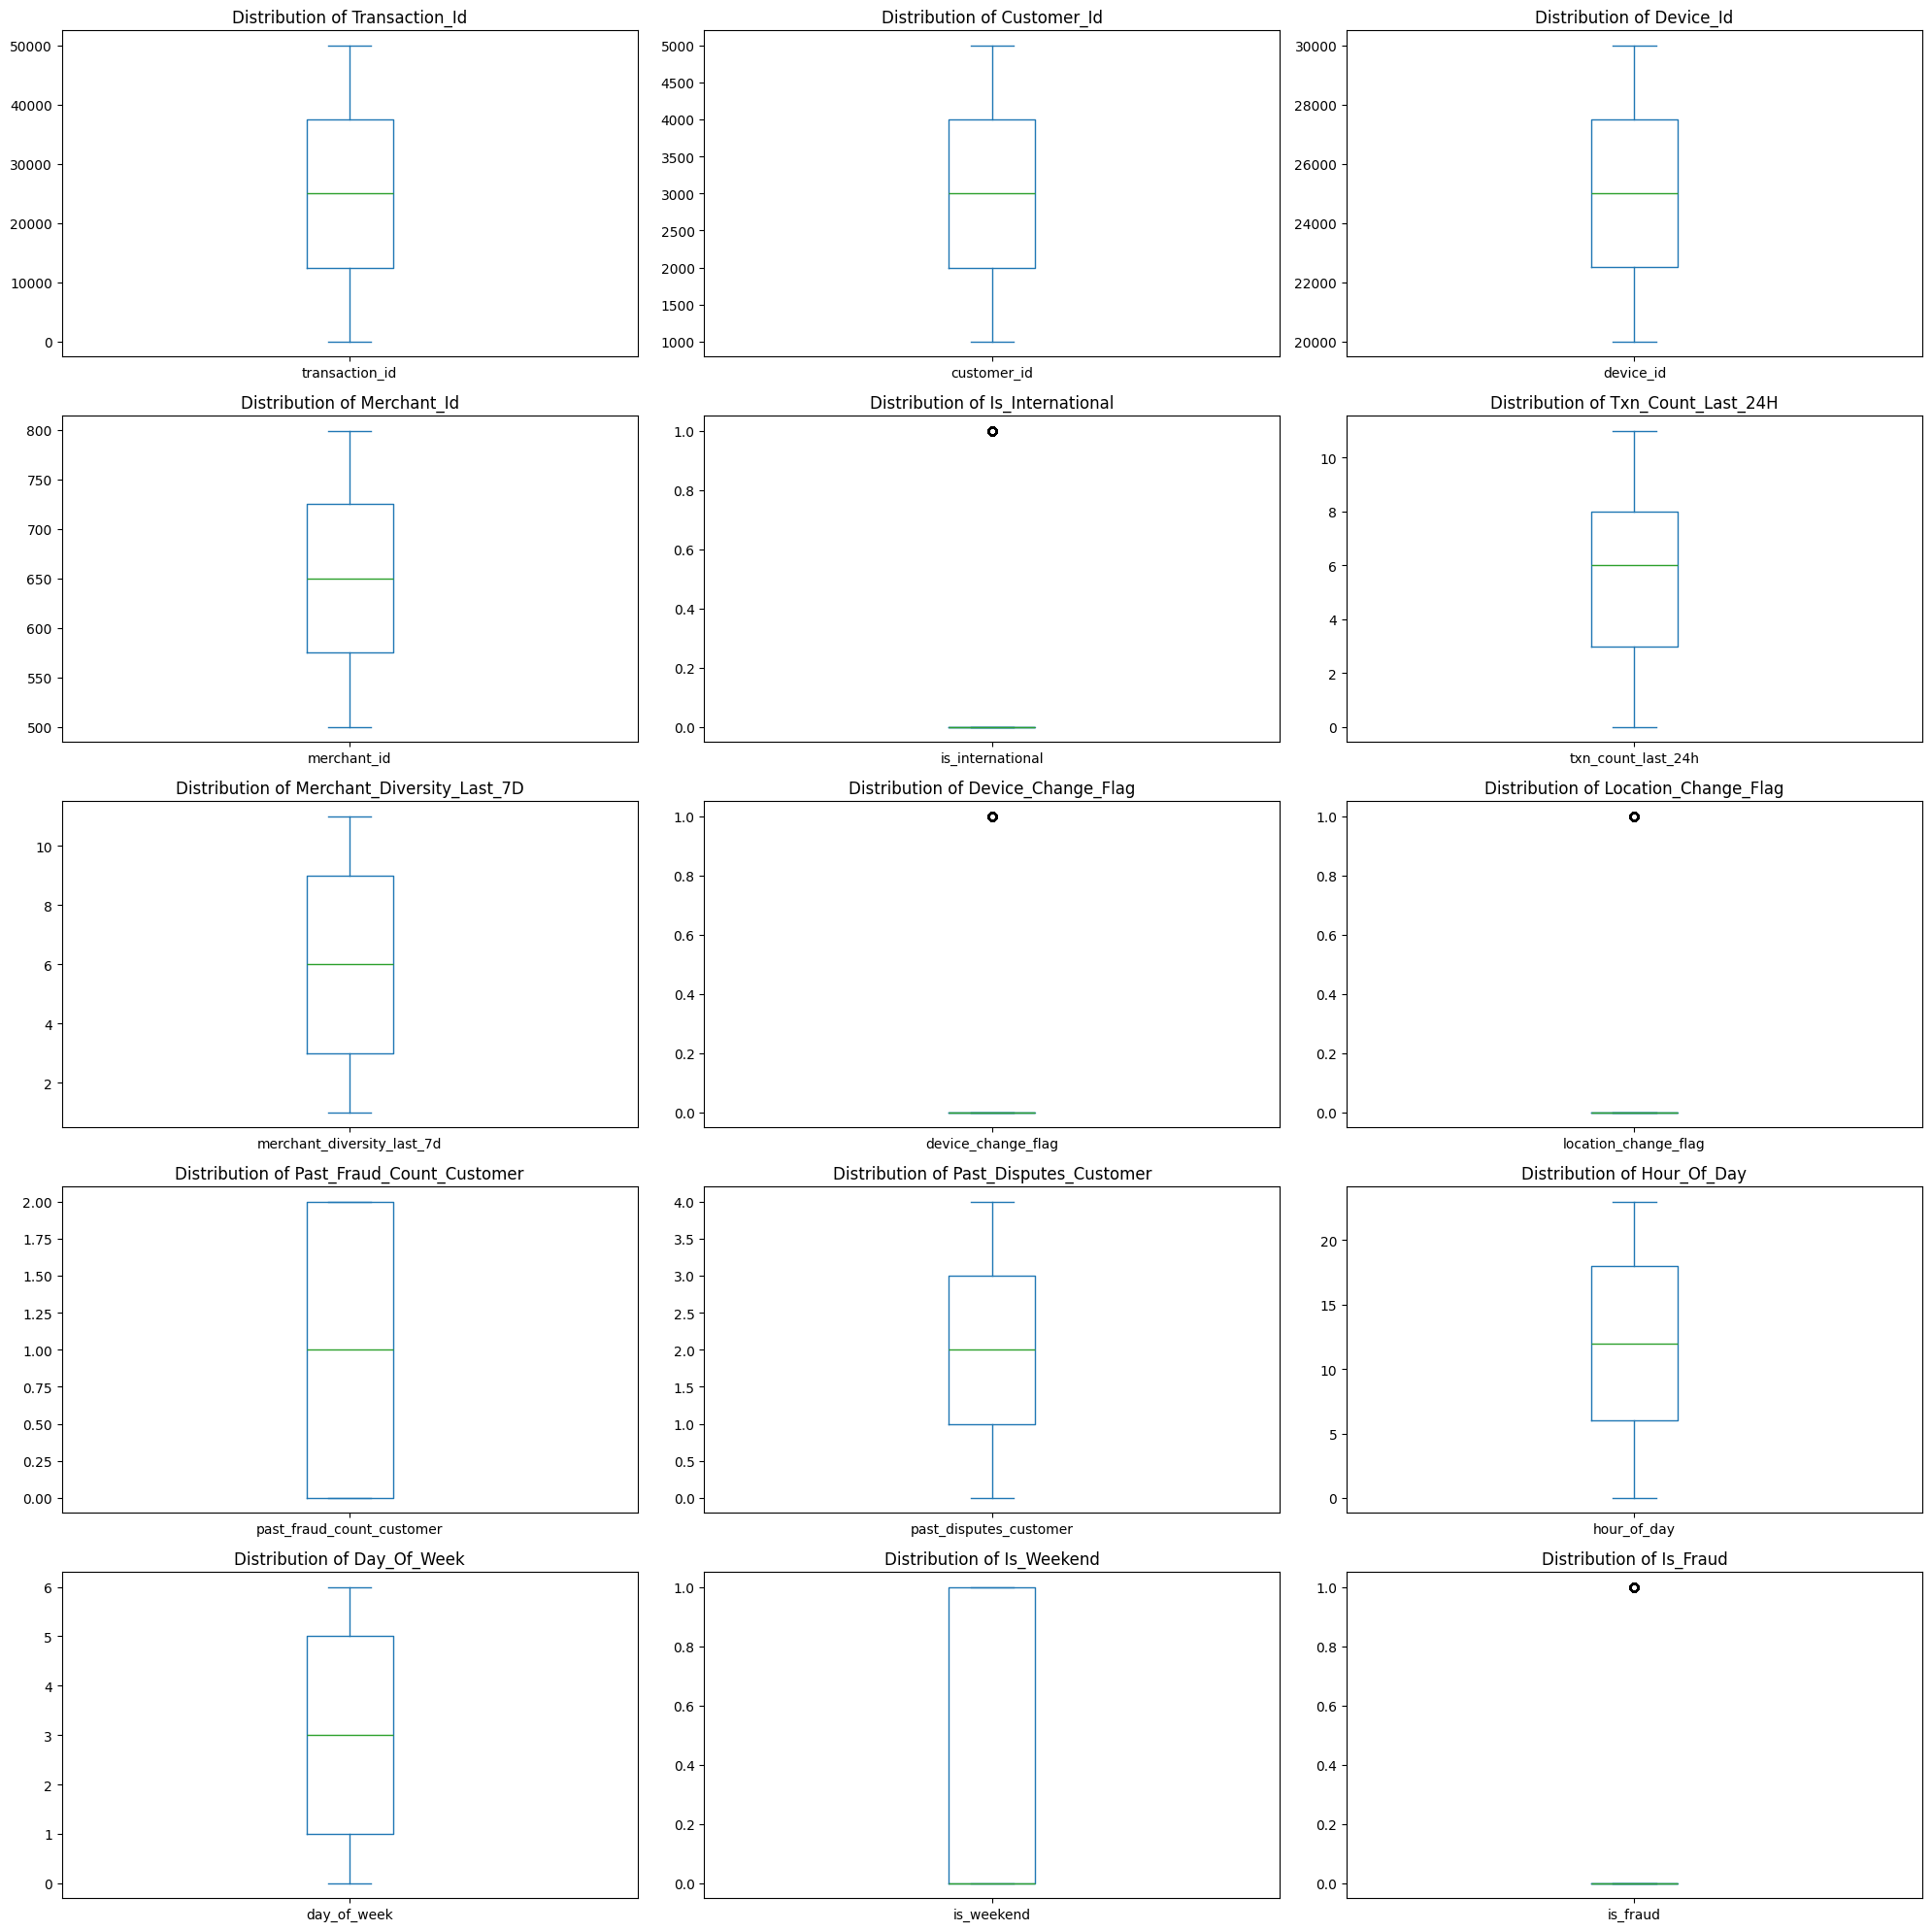

In [89]:
# Box plot of numerical variables

int_cols = df.select_dtypes('int').columns
num_cols = len(int_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows needed for 3 columns

plt.figure(figsize=(20, 4 * num_rows))

# Create a subplot of box plots for numerical variables
for idx, col in enumerate(int_cols, 1):
    ax = plt.subplot(num_rows, 3, idx)
    df[col].plot(kind='box')
    plt.title(f'Distribution of {col.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()